### THis is an implementation of modefied Gradient Descent methods using Accelerated Gradient Descent with Adaptive learning rate.

## Imports

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score

# Prepare Data

To have a dataset or set of data points,generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [4]:
x= np.linspace(0,20)
a=-1
b=2
y= a*x + b

In [5]:
print(x)
print(y)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
[  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.8367

#### Plot your data points. 

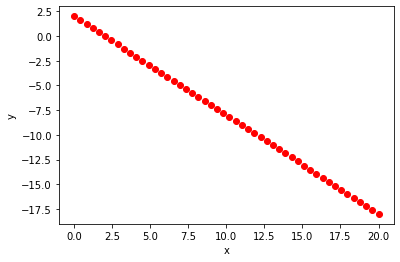

In [6]:
plt.scatter(x, y, marker='o', color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Adagrad

The function have the following input parameters:
1. Input data as a matrix (or vector based on your data).
2. Target label as a vector.
3. Learning rate.
4. Epsilon.
5. Maximum number of iterations (Epochs).

The funtion return the following outputs:
1. All predicted Theta_0 in all iterations.
2. All predicted Theta_1 in all iterations.
3. Corresponding loss for each Theta_0 and Theta_1 predictions.
4. All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
5. Final Optimum values of Theta_0 and Theta_1.


In [13]:
def adagrad_GD(in_data,target,learning_rate,epsilon,iter):
    
    in_data=in_data.reshape((-1,1))
    thetas = np.zeros([2,1])
    theta_zeros= []
    theta_ones = []
    m=len(in_data)
    x_vec=np.ones((m,2))
    x_vec[:,1]=x
    target=target.reshape((-1,1))

    theta_zeros.append(0)
    theta_ones.append(0)
    hypothsis=[]
    itr=[]
    MSE=[]
    V = np.zeros([2,1])
    #print(x_vec.shape)
    
    for i in range(iter): 

        y_predict =  x_vec @ thetas 
    
        hypothsis.append(y_predict)
        
    
        gradient= (-1/m) * ((target-y_predict).transpose() @ x_vec )
        V = V + ( gradient.transpose() **2)
        
        v_sq = np.sqrt(V)
        
        
        thetas= thetas - (learning_rate / (v_sq + epsilon)) * gradient.transpose()
       
    
        MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/m))
        itr.append(i)
       
        theta_zeros.append(thetas[0])
        theta_ones.append(thetas[1])
        
        if i>0:
            if (abs(MSE[i]-MSE[i-1])<0.001):
                break
            if(abs(np.linalg.norm([theta_zeros[i],theta_ones[i]]) -  np.linalg.norm([theta_zeros[i-1],theta_ones[i-1]]) ) <0.001):
                break
    MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/m))
    itr.append(i)
    return theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec,itr

In [14]:
theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec,itr = adagrad_GD(x,y,0.05,0.6,1000)
print(thetas)

[[-0.62542523]
 [-0.72187634]]


In [15]:
y_predicted= x_vec @ thetas

In [16]:
r2_score(y, y_predicted)

0.9219474769209396

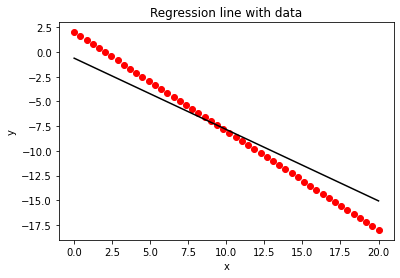

In [19]:
plt.scatter(x, y, marker='o', color='red')
plt.plot(x,y_predicted, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression line with data")
plt.show()

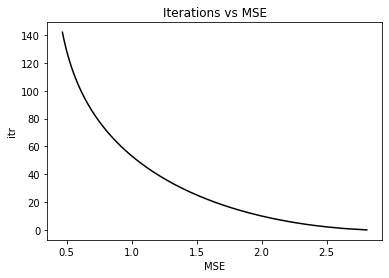

In [20]:
plt.plot(MSE,itr, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("MSE")
plt.ylabel("itr")
plt.title("Iterations vs MSE")
plt.show()

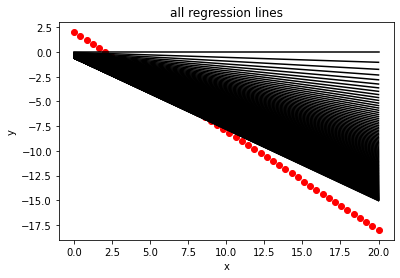

In [21]:
plt.scatter(x, y, marker='o', color='red')
for h in hypothsis:
    plt.plot(x,h, color='black',markerfacecolor='red',linestyle='-')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("all regression lines")
plt.show()

# RMSProp

In [22]:
def RMSProp_GD(in_data,target,learning_rate,epsilon,beta,iter):
    
    in_data=in_data.reshape((-1,1))
    thetas = np.zeros([2,1])
    theta_zeros= []
    theta_ones = []
    m=len(in_data)
    x_vec=np.ones((m,2))
    x_vec[:,1]=x
    target=target.reshape((-1,1))

    theta_zeros.append(0)
    theta_ones.append(0)
    hypothsis=[]
    itr=[]
    MSE=[]
    V = np.zeros([2,1])
    #print(x_vec.shape)
    
    for i in range(iter): 

        y_predict =  x_vec @ thetas 
    
        hypothsis.append(y_predict)
        
    
        gradient= (-1/m) * ((target-y_predict).transpose() @ x_vec )
        V = (V *beta )+  (1-beta) * ( gradient.transpose() **2)
        
        v_sq = np.sqrt(V)
        
        
        thetas= thetas - (learning_rate / (v_sq + epsilon)) * gradient.transpose()
       
    
        MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/m))
        itr.append(i)
       
        theta_zeros.append(thetas[0])
        theta_ones.append(thetas[1])
        
        if i>0:
            if (abs(MSE[i]-MSE[i-1])<0.001):
                break
            if(abs(np.linalg.norm([theta_zeros[i],theta_ones[i]]) -  np.linalg.norm([theta_zeros[i-1],theta_ones[i-1]]) ) <0.001):
                break
    MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/m))
    itr.append(i)
    return theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec,itr

In [23]:
theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec,itr = RMSProp_GD(x,y,0.05,0.005,0.9,1000)
print(thetas)

[[-0.61879917]
 [-0.78470258]]


In [24]:
y_predicted= x_vec @ thetas

In [25]:
r2_score(y, y_predicted)

0.9473925192636036

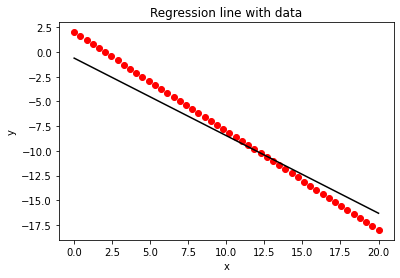

In [26]:
plt.scatter(x, y, marker='o', color='red')
plt.plot(x,y_predicted, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression line with data")
plt.show()

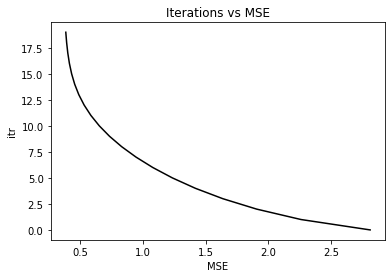

In [27]:
plt.plot(MSE,itr, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("MSE")
plt.ylabel("itr")
plt.title("Iterations vs MSE")
plt.show()

## Adam

In [28]:
def Adam_GD(in_data,target,learning_rate,epsilon,beta_one,beta_two,iter):
    
    in_data=in_data.reshape((-1,1))
    thetas = np.zeros([2,1])
    theta_zeros= []
    theta_ones = []
    m=len(in_data)
    x_vec=np.ones((m,2))
    x_vec[:,1]=x
    target=target.reshape((-1,1))

    theta_zeros.append(0)
    theta_ones.append(0)
    hypothsis=[]
    itr=[]
    MSE=[]
    M = np.zeros([2,1])
    V = np.zeros([2,1])
    #print(x_vec.shape)
    
    for i in range(iter): 

        y_predict =  x_vec @ thetas 
    
        hypothsis.append(y_predict)
        
    
        gradient= (-1/m) * ((target-y_predict).transpose() @ x_vec )
        
        M = (M *beta_one ) +  (1-beta_one) * gradient.transpose() 
        V = (V *beta_two ) +  (1-beta_two) * ( gradient.transpose() **2)
        
        v_sq = np.sqrt(V)
        
        
        thetas= thetas - (learning_rate / ( v_sq + epsilon)) * M
       
    
        MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/m))
        itr.append(i)
       
        theta_zeros.append(thetas[0])
        theta_ones.append(thetas[1])
        
        if i>0:
            if (abs(MSE[i]-MSE[i-1])<0.001):
                break
            if(abs(np.linalg.norm([theta_zeros[i],theta_ones[i]]) -  np.linalg.norm([theta_zeros[i-1],theta_ones[i-1]]) ) <0.001):
                break
    MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/m))
    itr.append(i)
    return theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec,itr

In [29]:
theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec,itr = Adam_GD(x,y,0.05,0.005,0.6,0.5,500)
print(thetas)

[[-0.77915711]
 [-0.85026709]]


In [30]:
y_predicted= x_vec @ thetas

In [31]:
r2_score(y, y_predicted)

0.9302206018715292

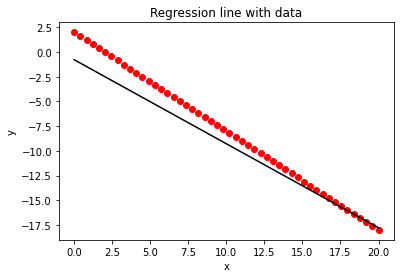

In [34]:
plt.scatter(x, y, marker='o', color='red')
plt.plot(x,y_predicted, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression line with data")
plt.show()

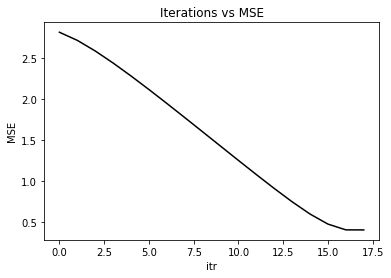

In [35]:
plt.plot(itr,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("itr")
plt.ylabel("MSE")
plt.title("Iterations vs MSE")
plt.show()